In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
# magic function %matplotlib inline to enable the inline plotting, where the plots/graphs will be displayed just below the cell where your plotting commands are written
# to put heading use '#<space><whatever to write>', similiary use ## or ### to make the font smaller
import seaborn as sns

# Documentation

In [2]:
#pd.show_versions() #to see all
pd.__version__

'1.3.4'

In [3]:
#pd.read_csv? # to check what the method does, it's signature(what parameters to insert), docstring(what it does) etc.
pd.value_counts?
# type pd.read_csv and press "shift + tab" to get documentation here itself

# Series and Datframe


In [4]:
df1 = pd.read_csv('Ex_Files_Pandas_EssT/ExerciseFiles/data/olympics.csv',skiprows=4)
country_code_df = pd.read_csv('Ex_Files_Pandas_EssT/ExerciseFiles/data/Summer Olympic medallists 1896 to 2008 - IOC COUNTRY CODES.csv')

In [5]:
df1.head(4) # first 4, by default it is 5

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold


In [6]:
df1.tail()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold
29215,Beijing,2008,Wrestling,Wrestling Gre-R,"BAROEV, Khasan",RUS,Men,96 - 120kg,M,Silver


A series is a one dimentional array of indexed data. They can be accessed by following 2 ways

In [7]:
a = df1['City'] # just mentionening series name (column name)
b = df1.City # here it will work, won't work if column name has space
c = df1[['City','Edition']] # for multiple series access put a list within square brackets

In [8]:
print(type(a),"\n",type(b),"\n", type(c)) # to see the type, notice when calling 2 series it becomes dataframe

<class 'pandas.core.series.Series'> 
 <class 'pandas.core.series.Series'> 
 <class 'pandas.core.frame.DataFrame'>


# Data input and validation

 Shape attribute returns the tupple telling rows and columns in it

In [9]:
print(type(df1.shape))
print(df1.shape)
print(df1.shape[0])  # number of rows
print(df1.shape[1])   # number of columns


<class 'tuple'>
(29216, 10)
29216
10


Info is used to tell charcteristics of data in dataframe as in datatype of the series, null or not

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


# Basic analysis

value_counts()

In [11]:
df1.Edition.value_counts(sort = True, dropna = False, normalize = True) # to view normalised result

#df1.['Edition'].value_counts(sort = True, dropna = False, normalize = True) # won't work


2008    0.069893
2000    0.068969
2004    0.068387
1996    0.063630
1992    0.058358
1988    0.052916
1984    0.049938
1980    0.047474
1976    0.044667
1920    0.044428
1972    0.040560
1968    0.035289
1964    0.034570
1952    0.030429
1912    0.030292
1956    0.030292
1924    0.030257
1960    0.030189
1936    0.029949
1948    0.027861
1908    0.027519
1928    0.024302
1932    0.021050
1900    0.017525
1904    0.016087
1896    0.005168
Name: Edition, dtype: float64

In [12]:
df1.Edition.value_counts(sort = True, dropna = False) # here notice that edition actually becomes index

2008    2042
2000    2015
2004    1998
1996    1859
1992    1705
1988    1546
1984    1459
1980    1387
1976    1305
1920    1298
1972    1185
1968    1031
1964    1010
1952     889
1912     885
1956     885
1924     884
1960     882
1936     875
1948     814
1908     804
1928     710
1932     615
1900     512
1904     470
1896     151
Name: Edition, dtype: int64

In [13]:
df2=df1.value_counts(subset = ['Gender','Edition'] ,sort = True, dropna = False) # subset can only be used with dataframe not series
display(df2)
print(type(df2)) # notice that this is series

Gender  Edition
Men     1920       1255
        2000       1126
        2008       1110
        1992       1105
        2004       1099
        1996       1082
        1988       1011
        1984        973
        1980        958
        1972        947
Women   2008        932
Men     1976        924
Women   2004        899
        2000        889
Men     1912        855
        1924        833
        1964        820
        1968        819
        1936        791
        1908        789
Women   1996        777
Men     1952        750
        1956        739
        1960        737
        1948        718
        1928        615
Women   1992        600
Men     1932        555
Women   1988        535
Men     1900        501
Women   1984        486
Men     1904        458
Women   1980        429
        1976        381
        1972        238
        1968        212
        1964        190
Men     1896        151
Women   1956        146
        1960        145
        1952        139


<class 'pandas.core.series.Series'>


In [14]:
type(df2) # type of output is series

pandas.core.series.Series

sort_values()

In [15]:
a.sort_values() # sorting series

5177     Amsterdam
5398     Amsterdam
5399     Amsterdam
5400     Amsterdam
5401     Amsterdam
           ...    
10737        Tokyo
10736        Tokyo
10735        Tokyo
10748        Tokyo
11623        Tokyo
Name: City, Length: 29216, dtype: object

If inplace is true then the changes are made in dataframe itself that df1. By default it is false, in case it is false, that means that change won't be stores, to store the change you have to assign it to another dataframe that is.  df2 = df1.sort_values(by = ['Medal','Athlete'], inplace = False)

In [16]:
df1.sort_values(by = ['Medal','Athlete'], inplace = False)


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
2849,Antwerp,1920,Aquatics,Swimming,"AALTONEN, Arvo Ossian",FIN,Men,200m breaststroke,M,Bronze
2852,Antwerp,1920,Aquatics,Swimming,"AALTONEN, Arvo Ossian",FIN,Men,400m breaststroke,M,Bronze
7709,London,1948,Gymnastics,Artistic G.,"AALTONEN, Paavo Johannes",FIN,Men,individual all-round,M,Bronze
8563,Helsinki,1952,Gymnastics,Artistic G.,"AALTONEN, Paavo Johannes",FIN,Men,team competition,M,Bronze
19062,Seoul,1988,Hockey,Hockey,"AARDENBURG, Willemien",NED,Women,hockey,W,Bronze
...,...,...,...,...,...,...,...,...,...,...
2730,Stockholm,1912,Shooting,Shooting,"ÖSTENSEN, Östen",NOR,Men,"free rifle, team",M,Silver
3868,Antwerp,1920,Shooting,Shooting,"ÖSTENSEN, Östen",NOR,Men,"300+600m free rifle, team, prone",M,Silver
4009,Antwerp,1920,Shooting,Shooting,"ÖSTENSEN, Östen",NOR,Men,"free rifle, team",M,Silver
608,Paris,1900,Shooting,Shooting,"ÖSTMO, Ole",NOR,Men,"army rifle, 300m, standing",M,Silver


In [17]:
df1.sort_values(by = 'Athlete')

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
651,Paris,1900,Tug of War,Tug of War,"AABYE, Edgar",ZZX,Men,tug of war,M,Gold
2849,Antwerp,1920,Aquatics,Swimming,"AALTONEN, Arvo Ossian",FIN,Men,200m breaststroke,M,Bronze
2852,Antwerp,1920,Aquatics,Swimming,"AALTONEN, Arvo Ossian",FIN,Men,400m breaststroke,M,Bronze
7716,London,1948,Gymnastics,Artistic G.,"AALTONEN, Paavo Johannes",FIN,Men,pommel horse,M,Gold
7730,London,1948,Gymnastics,Artistic G.,"AALTONEN, Paavo Johannes",FIN,Men,team competition,M,Gold
...,...,...,...,...,...,...,...,...,...,...
603,Paris,1900,Shooting,Shooting,"ÖSTMO, Ole",NOR,Men,"army rifle, 300m, prone",M,Bronze
608,Paris,1900,Shooting,Shooting,"ÖSTMO, Ole",NOR,Men,"army rifle, 300m, standing",M,Silver
621,Paris,1900,Shooting,Shooting,"ÖSTMO, Ole",NOR,Men,"free rifle, team",M,Silver
596,Paris,1900,Shooting,Shooting,"ÖSTMO, Ole",NOR,Men,"army rifle, 300m, 3 positions",M,Bronze


In [18]:
df1.sort_values(by = ['Medal', 'Athlete'], axis = 0, ascending = [False,True], kind = 'quicksort', na_position = 'last', ignore_index = True)
# axis means which axis to sort by, ignore_index will reset the index to 0,1,2 etc
#df1.sort_values?


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Antwerp,1920,Gymnastics,Artistic G.,"AANING, Alf Lied",NOR,Men,"team, free system",M,Silver
1,Atlanta,1996,Rowing,Rowing,"AARDEWIJN, Pepijn",NED,Men,lightweight double sculls (2x),M,Silver
2,Antwerp,1920,Gymnastics,Artistic G.,"AAS, Karl Jan",NOR,Men,"team, free system",M,Silver
3,Beijing,2008,Athletics,Athletics,"ABAKUMOVA, Maria",RUS,Women,javelin throw,W,Silver
4,Athens,2004,Wrestling,Wrestling Free.,"ABAS, Stephen",USA,Men,- 55kg,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Antwerp,1920,Shooting,Shooting,"ÖSTENSEN, Östen",NOR,Men,300m free rifle 3 positions (3x40 shots),M,Bronze
29212,Antwerp,1920,Shooting,Shooting,"ÖSTENSEN, Östen",NOR,Men,"50m small bore rifle, team",M,Bronze
29213,Paris,1900,Shooting,Shooting,"ÖSTMO, Ole",NOR,Men,"army rifle, 300m, 3 positions",M,Bronze
29214,Paris,1900,Shooting,Shooting,"ÖSTMO, Ole",NOR,Men,"army rifle, 300m, prone",M,Bronze


Boolean list of ascending argument must match the number in by(equal or less)

In [19]:
#df1.sort_values(by = ['Medal','Athlete'], ascending = [False]) # error
#df1.sort_values(by = ['Medal','Athlete'], ascending = False) #this will be fine
df1.sort_values(by = ['Medal','Athlete'], ascending = [False, True]) 

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
3436,Antwerp,1920,Gymnastics,Artistic G.,"AANING, Alf Lied",NOR,Men,"team, free system",M,Silver
22769,Atlanta,1996,Rowing,Rowing,"AARDEWIJN, Pepijn",NED,Men,lightweight double sculls (2x),M,Silver
3437,Antwerp,1920,Gymnastics,Artistic G.,"AAS, Karl Jan",NOR,Men,"team, free system",M,Silver
27691,Beijing,2008,Athletics,Athletics,"ABAKUMOVA, Maria",RUS,Women,javelin throw,W,Silver
27125,Athens,2004,Wrestling,Wrestling Free.,"ABAS, Stephen",USA,Men,- 55kg,M,Silver
...,...,...,...,...,...,...,...,...,...,...
3870,Antwerp,1920,Shooting,Shooting,"ÖSTENSEN, Östen",NOR,Men,300m free rifle 3 positions (3x40 shots),M,Bronze
3942,Antwerp,1920,Shooting,Shooting,"ÖSTENSEN, Östen",NOR,Men,"50m small bore rifle, team",M,Bronze
596,Paris,1900,Shooting,Shooting,"ÖSTMO, Ole",NOR,Men,"army rifle, 300m, 3 positions",M,Bronze
603,Paris,1900,Shooting,Shooting,"ÖSTMO, Ole",NOR,Men,"army rifle, 300m, prone",M,Bronze


Boolean indexing - multiple conditions to filter out the data

AND &

OR        |

NOT ~

In [20]:
df1['Medal'] == 'Gold'


0         True
1        False
2        False
3         True
4        False
         ...  
29211    False
29212    False
29213    False
29214     True
29215    False
Name: Medal, Length: 29216, dtype: bool

In [21]:
df1[df1['Medal'] == 'Gold']
#df1[df1.Medal == 'Gold']    # same thing

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
...,...,...,...,...,...,...,...,...,...,...
29199,Beijing,2008,Wrestling,Wrestling Gre-R,"GUENOT, Steeve",FRA,Men,60 - 66kg,M,Gold
29203,Beijing,2008,Wrestling,Wrestling Gre-R,"KVIRKELIA, Manuchar",GEO,Men,66 - 74kg,M,Gold
29206,Beijing,2008,Wrestling,Wrestling Gre-R,"MINGUZZI, Andrea",ITA,Men,74 - 84kg,M,Gold
29210,Beijing,2008,Wrestling,Wrestling Gre-R,"KHUSHTOV, Aslanbek",RUS,Men,84 - 96kg,M,Gold


In [22]:
df1[(df1['Medal'] == 'Gold') & (df1['Gender'] == 'Women')] # fails without those normal brackets () so make sure that all condition are inclosed within brackets

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
417,Paris,1900,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,individual,W,Gold
641,Paris,1900,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,mixed doubles,X,Gold
649,Paris,1900,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,singles,W,Gold
710,St Louis,1904,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,double columbia round (50y - 40y - 30y),W,Gold
713,St Louis,1904,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,double national round (60y - 50y),W,Gold
...,...,...,...,...,...,...,...,...,...,...
29134,Beijing,2008,Weightlifting,Weightlifting,"CAO, Lei",CHN,Women,75kg,W,Gold
29147,Beijing,2008,Wrestling,Wrestling Free.,"HUYNH, Carol",CAN,Women,- 48kg,W,Gold
29155,Beijing,2008,Wrestling,Wrestling Free.,"YOSHIDA, Saori",JPN,Women,48 - 55kg,W,Gold
29163,Beijing,2008,Wrestling,Wrestling Free.,"ICHO, Kaori",JPN,Women,55 - 63kg,W,Gold


String function

series.str.contains()

series.str.startswith()

series.str.isnumeric()


In [23]:
df1['Athlete'].str.contains('Flo')

0        False
1        False
2        False
3        False
4        False
         ...  
29211    False
29212    False
29213    False
29214    False
29215    False
Name: Athlete, Length: 29216, dtype: bool

In [24]:
df1[df1['Athlete'].str.contains('Flo')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
1843,London,1908,Skating,Figure skating,"SYERS, Florence",GBR,Women,individual,W,Gold
1848,London,1908,Skating,Figure skating,"SYERS, Florence",GBR,Women,pairs,X,Bronze
3775,Antwerp,1920,Sailing,Sailing,"CORNELLIE, Florimond",BEL,Men,6m (rating 1907),X,Gold
4080,Antwerp,1920,Weightlifting,Weightlifting,"ROOMS, Georges Florimond",BEL,Men,"60 - 67.5kg, one-two hand 3 events (lightweight)",M,Bronze
4173,Paris,1924,Aquatics,Swimming,"BARKER, Florence",GBR,Women,4x100m freestyle relay,W,Silver
7376,London,1948,Athletics,Athletics,"SIMMONS, Floyd Macon Jr.",USA,Men,decathlon,M,Bronze
8162,Helsinki,1952,Athletics,Athletics,"FOULDS-PAUL, June Florence",GBR,Women,4x100m relay,W,Bronze
8195,Helsinki,1952,Athletics,Athletics,"SIMMONS, Floyd Macon Jr.",USA,Men,decathlon,M,Bronze
8314,Helsinki,1952,Boxing,Boxing,"PATTERSON, Floyd",USA,Men,71-75kg,M,Gold
9060,Melbourne / Stockholm,1956,Athletics,Athletics,"FOULDS-PAUL, June Florence",GBR,Women,4x100m relay,W,Silver


QUESTIONS

1. in which event did jesse owens win a medal

In [25]:
df2 =df1[(df1['Athlete'].str.contains('Jesse')) & (df1['Athlete'].str.contains('OWENS'))]
df2['Event'].value_counts()

100m            1
200m            1
4x100m relay    1
long jump       1
Name: Event, dtype: int64

2. Which country has won the most men's gold medal in single badminton over the years. Sort the result alphabatically by player name

In [26]:
df2 = df1[df1.Event.str.contains('singles') & df1['Sport'].str.contains('Badminton') & df1['Gender'].str.contains('Men') & df1['Medal'].str.contains('Gold')]
#pd.value_counts?
df2
df3 = df2.value_counts(df2['NOC'])
df3 
#df5 = df1[df1.Event.str.lower().str.contains('singles')] # to make it case insensitive

NOC
CHN    2
INA    2
DEN    1
dtype: int64

In [27]:
df4 = df2.sort_values(by = 'Athlete')
df4

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
25734,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold
21787,Atlanta,1996,Badminton,Badminton,"HOYER-LARSEN, Poul Erik",DEN,Men,singles,M,Gold
23717,Sydney,2000,Badminton,Badminton,"JI, Xinpeng",CHN,Men,singles,M,Gold
27741,Beijing,2008,Badminton,Badminton,"LIN, Dan",CHN,Men,singles,M,Gold


3. which 3 countries have won the most medals in recent years ( 1984 to 2008 )

In [28]:
df2 = df1[(df1['Edition'] >= 1984) & (df1['Edition'] <= 2008)] # brackets () are important
df2.value_counts(df2['NOC']).head(3)

NOC
USA    1837
AUS     762
GER     691
dtype: int64

4. Display male gold medal winner for 100m track and field sprint event. List from most recent

In [29]:
df2 = df1[df1['Gender'].str.contains('Men')  & (df1['Medal'] =='Gold')  & (df1['Event'] == '100m') ]
df2[['Edition','Athlete','NOC']].sort_values(by = 'Edition', ascending = False)
#df2.sort_values(by = 'Edition', ascending = False)[['Edition','Athlete','NOC']]  # this will also work

,Edition,Athlete,NOC
27552,2008,"BOLT, Usain",JAM
25539,2004,"GATLIN, Justin",USA
23521,2000,"GREENE, Maurice",USA
21598,1996,"BAILEY, Donovan",CAN
19859,1992,"CHRISTIE, Linford",GBR
18284,1988,"LEWIS, Carl",USA
16794,1984,"LEWIS, Carl",USA
15374,1980,"WELLS, Allan",GBR
14069,1976,"CRAWFORD, Hasely",TRI
12902,1972,"BORZOV, Valery",URS


# BASIC PLOTTING

Plot Types: plot()

plot(kind = 'line') - tracking changes over a period of time(by default it's line)

plot(kind = 'bar')  - compare things between different groups. When measuring changes over time, best to use when changes are large

plot(kind = 'pie') - compare parts of the whole. Not for changes over time

plot(kind = 'barh') - horizontal bar graph

What were the different sports in first olympics. Plot them using graphs

<AxesSubplot:xlabel='Sport'>

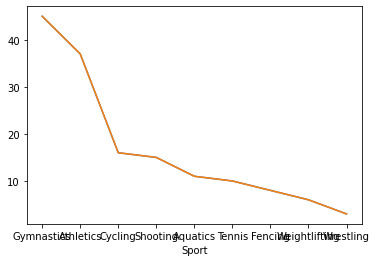

In [30]:
df2 = df1[df1['Edition'] == 1896]
df2.value_counts(df2['Sport'])
df2.value_counts(df2['Sport']).plot() # by default we get a line plot
df2.value_counts(df2['Sport']).plot(kind = 'line') # in this case the line plot has overlapping labels in the axis


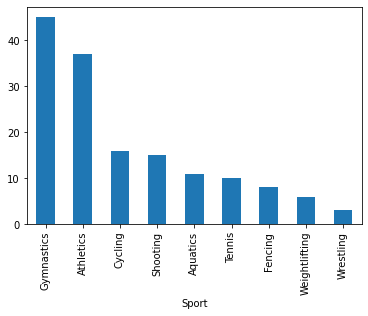

In [31]:
df2.value_counts(df2['Sport']).plot(kind = 'bar'); # ; is used to suppress that written axessubplot

<AxesSubplot:ylabel='None'>

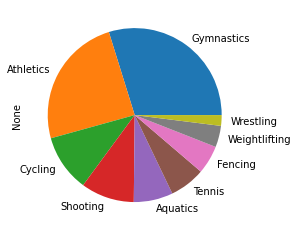

In [32]:
df2.value_counts(df2['Sport']).plot(kind = 'pie')

Plot Color

plot(kind = 'bar', color = 'red) - just color can also be there. Name of the color can be checked from matplotlib site

<AxesSubplot:xlabel='Sport'>

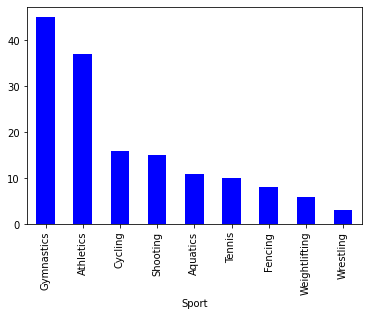

In [33]:
df2.value_counts(df2['Sport']).plot(kind = 'bar', color = 'blue') # color is not working for pie chart

figsize() - is a tuple use to metion width and height fo the graph

<AxesSubplot:xlabel='Sport'>

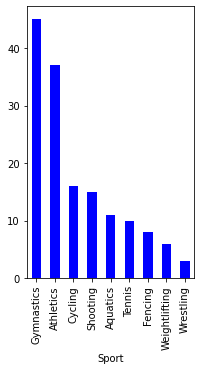

In [34]:
df2.value_counts(df2['Sport']).plot(kind = 'bar', color = 'blue', figsize=(3,5))

Colormap

Gives a good represenation of data.There are 3 classes of colormap.

Sequential - should be used to represent data that has ordering

Diverging - when the information being plotted is deviated around middle value
 
Qualitative - information that doesn't have any ordering or relationship and are often miscellenous colors



<AxesSubplot:ylabel='None'>

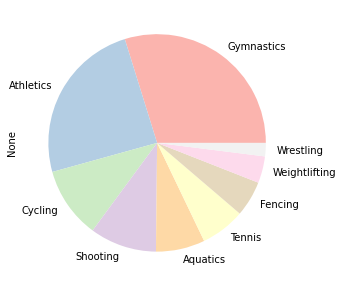

In [35]:
df2.value_counts(df2['Sport']).plot(kind = 'pie', colormap = 'Pastel1', figsize = (5,5)) # for pie chart colormap works but not color

 Seaborn
 
 Porduces attractive statistical plot. It not a substitute but a complement of matplotlib. It integrates well with Pandas. It has a an example gallery. Let's take a look at one the methods called countplot(data = "source of data", hue = "categorical variables (variable that can only take a fixed number of values. hue allows us specific a categorical variable with different color like medals are gold silver and bronze)", order = "determine the sequence when using categorical values", palette = "choose color for different level of hue variable" )
 
 Matplotlib vs seaborn
 
 matplotlib when script is short and we want to use simpple graphs like line, bar etc etc. 
 
 Seaborn when dealing with statistical or categorical data requiring advance plots
 
 Sample question: how many medals have been won by men and women in history pf olympics. How many gold silver and bronze were won by each gender

<AxesSubplot:xlabel='Medal', ylabel='count'>

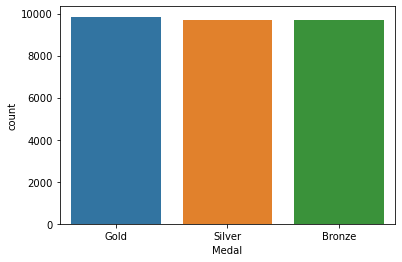

In [36]:
#df1.value_counts( subset = ['Gender','Medal']).plot(kind = 'bar')
#sns.countplot?
sns.countplot(x = 'Medal', data = df1)

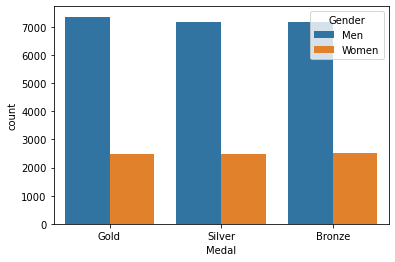

In [37]:
# to see gold, silver and bronze medal for each gender we use categorical variable
sns.countplot(x = 'Medal', data = df1, hue = 'Gender');

QUESTIONS

1. Plot the number of medals achieved by chinese team(men and women) in Beijing 2008 using

a. Matplotlib

b.seaborn

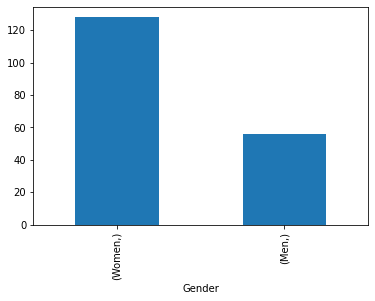

In [38]:
df2 = df1[(df1['Edition'] == 2008) & df1['City'].str.lower().str.contains('beijing') & (df1['NOC'] == 'CHN')]
df2.value_counts(subset = ['Gender']).plot(kind = 'bar');

<AxesSubplot:xlabel='Gender', ylabel='count'>

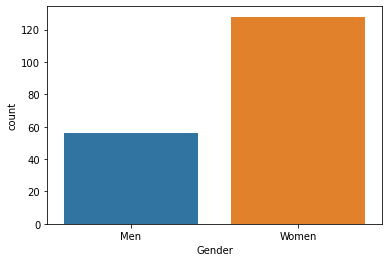

In [39]:
sns.countplot( data = df2 , x = 'Gender')

2. How to use colormaps to give data more meaning

<AxesSubplot:xlabel='Gender', ylabel='count'>

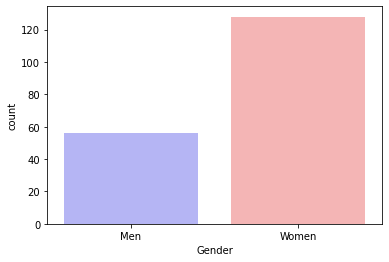

In [40]:
sns.countplot( data = df2 , x = 'Gender' , palette = 'bwr')
# use palette option to check the colour. Here we are using diverging colourmap to show men in bluish and women in pinkish

3. Plot the number of gold silver and bronze medal for each gender

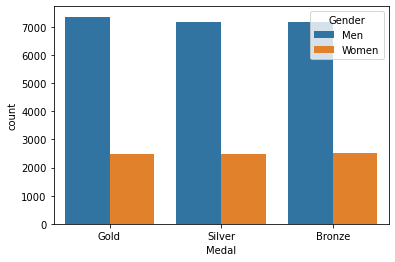

In [41]:
sns.countplot( data = df1 , x = 'Medal' , hue = 'Gender');

4. How can you give data more meaning? Is there anything else that you can do to make it more intuitive

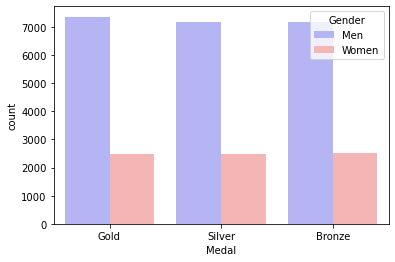

In [42]:
sns.countplot( data = df1 , x = 'Medal' , hue = 'Gender' , palette = 'bwr' , order = ['Gold','Silver','Bronze']);
# 1. use bwr from question 2
# 2. order the medals in x axis

In [43]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - An array or li

# INDEXING

Indexing is an immutable array that helps us to identify rows and columns using Labels

In [44]:
type(df2.index) # index has its own type

pandas.core.indexes.numeric.Int64Index

In [45]:
df2.index[3] # gives the value of index at 3rd position

27180

In [46]:
#df2.index[3] = 100 # error out since index are not mutable

set_index()

In [47]:
df2.set_index('Athlete', inplace = False) # store it in other dataframe or use inplace true to make changes in current df
#notice the indexed column gets droped, set drop = FALSE in case you don't want it to be dropped
ath_df = df2.set_index('Athlete')
ath_df1 = df2.set_index('Athlete')
ath_df

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"ZHOU, Luxin",Beijing,2008,Aquatics,Diving,CHN,Men,10m platform,M,Silver
"WANG, Xin",Beijing,2008,Aquatics,Diving,CHN,Women,10m platform,W,Bronze
"CHEN, Ruolin",Beijing,2008,Aquatics,Diving,CHN,Women,10m platform,W,Gold
"QIN, Kai",Beijing,2008,Aquatics,Diving,CHN,Men,3m springboard,M,Bronze
"HE, Chong",Beijing,2008,Aquatics,Diving,CHN,Men,3m springboard,M,Gold
...,...,...,...,...,...,...,...,...,...
"LI, Hongli",Beijing,2008,Weightlifting,Weightlifting,CHN,Men,77kg,M,Silver
"LU, Yong",Beijing,2008,Weightlifting,Weightlifting,CHN,Men,85kg,M,Gold
"XU, Li",Beijing,2008,Wrestling,Wrestling Free.,CHN,Women,48 - 55kg,W,Silver


reset_index()

In [48]:
ath_df.reset_index(inplace = True)
ath_df # index are reset from 0 and Athlete column gets restored

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
0,"ZHOU, Luxin",Beijing,2008,Aquatics,Diving,CHN,Men,10m platform,M,Silver
1,"WANG, Xin",Beijing,2008,Aquatics,Diving,CHN,Women,10m platform,W,Bronze
2,"CHEN, Ruolin",Beijing,2008,Aquatics,Diving,CHN,Women,10m platform,W,Gold
3,"QIN, Kai",Beijing,2008,Aquatics,Diving,CHN,Men,3m springboard,M,Bronze
4,"HE, Chong",Beijing,2008,Aquatics,Diving,CHN,Men,3m springboard,M,Gold
...,...,...,...,...,...,...,...,...,...,...
179,"LI, Hongli",Beijing,2008,Weightlifting,Weightlifting,CHN,Men,77kg,M,Silver
180,"LU, Yong",Beijing,2008,Weightlifting,Weightlifting,CHN,Men,85kg,M,Gold
181,"XU, Li",Beijing,2008,Wrestling,Wrestling Free.,CHN,Women,48 - 55kg,W,Silver
182,"WANG, Jiao",Beijing,2008,Wrestling,Wrestling Free.,CHN,Women,63 - 72kg,W,Gold


sort_index()

In [49]:
ath_df1.sort_index(inplace = True, ascending = False)
ath_df1 # normal alphabets are given lower value than special characters, keep that in mind while sorting

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"ZOU, Shiming",Beijing,2008,Boxing,Boxing,CHN,Men,48kg (light flywieght),M,Gold
"ZOU, Kai",Beijing,2008,Gymnastics,Artistic G.,CHN,Men,team competition,M,Gold
"ZOU, Kai",Beijing,2008,Gymnastics,Artistic G.,CHN,Men,floor exercises,M,Gold
"ZOU, Kai",Beijing,2008,Gymnastics,Artistic G.,CHN,Men,horizontal bar,M,Gold
"ZHU, Qinan",Beijing,2008,Shooting,Shooting,CHN,Men,10m air rifle (60 shots),M,Silver
...,...,...,...,...,...,...,...,...,...
"CHANG, Yongxiang",Beijing,2008,Wrestling,Wrestling Gre-R,CHN,Men,66 - 74kg,M,Silver
"CAO, Lei",Beijing,2008,Weightlifting,Weightlifting,CHN,Women,75kg,W,Gold
"CAI, Yun",Beijing,2008,Badminton,Badminton,CHN,Men,doubles,M,Silver


loc[] 
is a label based indexer for selection by Label

In [50]:
ath_df1.loc['ZOU, Kai']

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"ZOU, Kai",Beijing,2008,Gymnastics,Artistic G.,CHN,Men,team competition,M,Gold
"ZOU, Kai",Beijing,2008,Gymnastics,Artistic G.,CHN,Men,floor exercises,M,Gold
"ZOU, Kai",Beijing,2008,Gymnastics,Artistic G.,CHN,Men,horizontal bar,M,Gold


In [51]:
# we can use this even if index is not set to athlete
ath_df[ath_df['Athlete'] == 'ZOU, Kai' ]
# or
ath_df.loc[ath_df['Athlete'] == 'ZOU, Kai' ]
# they both give same result

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
72,"ZOU, Kai",Beijing,2008,Gymnastics,Artistic G.,CHN,Men,floor exercises,M,Gold
73,"ZOU, Kai",Beijing,2008,Gymnastics,Artistic G.,CHN,Men,horizontal bar,M,Gold
85,"ZOU, Kai",Beijing,2008,Gymnastics,Artistic G.,CHN,Men,team competition,M,Gold


iloc[] 

It is a primary integer based index. Advantage is that, it can be used with traditional python slicing

In [52]:
ath_df.iloc[4]

Athlete              HE, Chong
City                   Beijing
Edition                   2008
Sport                 Aquatics
Discipline              Diving
NOC                        CHN
Gender                     Men
Event           3m springboard
Event_gender                 M
Medal                     Gold
Name: 4, dtype: object

In [53]:
ath_df.iloc[[4,7,90]] # multiple indexes

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
4,"HE, Chong",Beijing,2008,Aquatics,Diving,CHN,Men,3m springboard,M,Gold
7,"HUO, Liang",Beijing,2008,Aquatics,Diving,CHN,Men,synchronized diving 10m platform,M,Gold
90,"LI, Shanshan",Beijing,2008,Gymnastics,Artistic G.,CHN,Women,team competition,W,Gold


In [54]:
ath_df.iloc[4:9] # python slicing

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
4,"HE, Chong",Beijing,2008,Aquatics,Diving,CHN,Men,3m springboard,M,Gold
5,"WU, Minxia",Beijing,2008,Aquatics,Diving,CHN,Women,3m springboard,W,Bronze
6,"GUO, Jingjing",Beijing,2008,Aquatics,Diving,CHN,Women,3m springboard,W,Gold
7,"HUO, Liang",Beijing,2008,Aquatics,Diving,CHN,Men,synchronized diving 10m platform,M,Gold
8,"LIN, Yue",Beijing,2008,Aquatics,Diving,CHN,Men,synchronized diving 10m platform,M,Gold


QUESTIONS

1. Plot the number of medals awarded at each olympic games throughout history

<AxesSubplot:xlabel='Edition'>

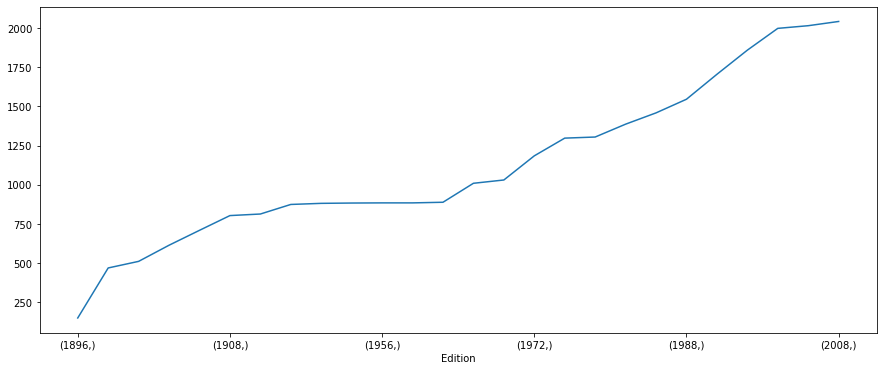

In [55]:
#df1[['Edition']].value_counts().plot(figsize = (15,6)) # value_counts here will put Edition in index
# in above,since the years are not sorted hence we are getting weird graph
df1[['Edition']].value_counts().sort_values().plot(figsize = (15,6))

2. Which countries did not win medal in 2008 olymics? How many countries were there

In [56]:
df2 = df1.NOC[df1['Edition'] == 2008].unique()
country_list = df2.tolist()
df3 = df1.NOC.unique()
all_country_list = df3.tolist()
final_list = []
for i in all_country_list:
    if i not in country_list:
        final_list.append(i)

print("country count:",len(final_list))
print('country list:',final_list)

    

country count: 52
country list: ['ZZX', 'BOH', 'ANZ', 'RU1', 'TCH', 'LUX', 'URU', 'YUG', 'HAI', 'PHI', 'SRI', 'PUR', 'PER', 'URS', 'LIB', 'EUA', 'PAK', 'BWI', 'GHA', 'IRQ', 'GDR', 'FRG', 'UGA', 'NIG', 'BER', 'TAN', 'GUY', 'CIV', 'ZAM', 'SYR', 'SUR', 'CRC', 'SEN', 'DJI', 'AHO', 'ISV', 'EUN', 'NAM', 'QAT', 'IOP', 'BDI', 'MOZ', 'TGA', 'HKG', 'BAR', 'KSA', 'KUW', 'MKD', 'SCG', 'ERI', 'PAR', 'UAE']


In [57]:
country_code_df.head()

,Country,Int Olympic Committee code,ISO code,Country.1
0,Afghanistan,AFG,AF,Afghanistan
1,Albania,ALB,AL,Albania
2,Algeria,ALG,DZ,Algeria
3,American Samoa*,ASA,AS,American Samoa*
4,Andorra,AND,AD,Andorra


In [58]:
# ALTERNATIVE APPROACH
country_code_df[country_code_df['Country'] != country_code_df['Country.1']] # to see if country.1 and country data differs


,Country,Int Olympic Committee code,ISO code,Country.1


In [59]:
oly_2008 = df1[df1['Edition'] == 2008]
oly_2008_series = oly_2008.value_counts('NOC')
oly_2008_series # getting series only having country as index for 2008 oly

NOC
USA    315
CHN    184
AUS    149
RUS    143
GER    101
      ... 
RSA      1
PAN      1
MAS      1
MDA      1
AFG      1
Length: 86, dtype: int64

In [60]:
country_code_df1 = country_code_df.set_index('Int Olympic Committee code') # getting NOC as index
country_code_df1['Country_check'] = oly_2008_series # kind of merging the series, it merges since they have same index
country_code_df1 # wherever it is nan, are the countries that did not win medal in 2008 olymics
country_code_df1['Country'][country_code_df1['Country_check'].isnull()]

Int Olympic Committee code
ALB                Albania
ASA        American Samoa*
AND                Andorra
ANG                 Angola
ANT    Antigua and Barbuda
              ...         
URU                Uruguay
VAN                Vanuatu
ISV        Virgin Islands*
YEM                  Yemen
ZAM                 Zambia
Name: Country, Length: 117, dtype: object

# Groupby()

here the output isn't exactly a dataframe but kind of dictionary of DataFrame

In [61]:
df1.groupby('Edition')

In [62]:
type(df1.groupby('Edition'))

pandas.core.groupby.generic.DataFrameGroupBy

In [63]:
list(df1.groupby('Edition'))

[(1896,
         City  Edition          Sport       Discipline  \
  0    Athens     1896       Aquatics         Swimming   
  1    Athens     1896       Aquatics         Swimming   
  2    Athens     1896       Aquatics         Swimming   
  3    Athens     1896       Aquatics         Swimming   
  4    Athens     1896       Aquatics         Swimming   
  ..      ...      ...            ...              ...   
  146  Athens     1896  Weightlifting    Weightlifting   
  147  Athens     1896  Weightlifting    Weightlifting   
  148  Athens     1896      Wrestling  Wrestling Gre-R   
  149  Athens     1896      Wrestling  Wrestling Gre-R   
  150  Athens     1896      Wrestling  Wrestling Gre-R   
  
                        Athlete  NOC Gender                        Event  \
  0               HAJOS, Alfred  HUN    Men               100m freestyle   
  1            HERSCHMANN, Otto  AUT    Men               100m freestyle   
  2           DRIVAS, Dimitrios  GRE    Men   100m freestyle for 

Iterating through group

In [64]:
for group_key, group_value in df1.groupby('Edition'):
    print(group_key)
    print(group_value)

1896
       City  Edition          Sport       Discipline  \
0    Athens     1896       Aquatics         Swimming   
1    Athens     1896       Aquatics         Swimming   
2    Athens     1896       Aquatics         Swimming   
3    Athens     1896       Aquatics         Swimming   
4    Athens     1896       Aquatics         Swimming   
..      ...      ...            ...              ...   
146  Athens     1896  Weightlifting    Weightlifting   
147  Athens     1896  Weightlifting    Weightlifting   
148  Athens     1896      Wrestling  Wrestling Gre-R   
149  Athens     1896      Wrestling  Wrestling Gre-R   
150  Athens     1896      Wrestling  Wrestling Gre-R   

                      Athlete  NOC Gender                        Event  \
0               HAJOS, Alfred  HUN    Men               100m freestyle   
1            HERSCHMANN, Otto  AUT    Men               100m freestyle   
2           DRIVAS, Dimitrios  GRE    Men   100m freestyle for sailors   
3          MALOKINIS, Ioan

        City  Edition      Sport       Discipline  \
7204  London     1948   Aquatics           Diving   
7205  London     1948   Aquatics           Diving   
7206  London     1948   Aquatics           Diving   
7207  London     1948   Aquatics           Diving   
7208  London     1948   Aquatics           Diving   
...      ...      ...        ...              ...   
8013  London     1948  Wrestling  Wrestling Gre-R   
8014  London     1948  Wrestling  Wrestling Gre-R   
8015  London     1948  Wrestling  Wrestling Gre-R   
8016  London     1948  Wrestling  Wrestling Gre-R   
8017  London     1948  Wrestling  Wrestling Gre-R   

                           Athlete  NOC Gender                          Event  \
7204        CAPILLA PEREZ, Joaquin  MEX    Men                   10m platform   
7205                   LEE, Samuel  USA    Men                   10m platform   
7206             HARLAN, Bruce Ira  USA    Men                   10m platform   
7207  CHRISTOFFERSEN-HANSON, Birte  DEN

In [65]:
type(group_value) # it's a dataframe

pandas.core.frame.DataFrame

In [66]:
df1.groupby('Edition').size()

Edition
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
dtype: int64

In [67]:
df1.groupby(['Edition','NOC','Medal']).size() # gives the count

Edition  NOC  Medal 
1896     AUS  Gold      2
         AUT  Bronze    2
              Gold      2
              Silver    1
         DEN  Bronze    3
                       ..
2008     UZB  Silver    2
         VEN  Bronze    1
         VIE  Silver    1
         ZIM  Gold      1
              Silver    3
Length: 2356, dtype: int64

In [68]:
# using aggregated function, it's input is in list here but can be dictionary as well
# dict keys specifics which series or column you want to apply the operations on and value specifies the function to run
# can even pass custom function
df1.groupby(['Edition','NOC','Medal']).agg(['min','max','count']) # using aggregated function, it's input is in list here but can be dictionary as well


City                         Sport                 \
                        min      max count            min            max   
Edition NOC Medal                                                          
1896    AUS Gold     Athens   Athens     2      Athletics      Athletics   
        AUT Bronze   Athens   Athens     2        Cycling        Cycling   
            Gold     Athens   Athens     2       Aquatics        Cycling   
            Silver   Athens   Athens     1       Aquatics       Aquatics   
        DEN Bronze   Athens   Athens     3        Fencing       Shooting   
...                     ...      ...   ...            ...            ...   
2008    UZB Silver  Beijing  Beijing     2           Judo      Wrestling   
        VEN Bronze  Beijing  Beijing     1      Taekwondo      Taekwondo   
        VIE Silver  Beijing  Beijing     1  Weightlifting  Weightlifting   
        ZIM Gold    Beijing  Beijing     1       Aquatics       Aquatics   
            Silver  Beijing  Beijing     3       Aquatics       Aquatics   

                             Discipline                         \
                   count            min              max count   
Edition NOC Medal                                                
1896    AUS Gold       2      Athletics        Athletics     2   
        AUT Bronze     2  Cycling Track    Cycling Track     2   
            Gold       2  Cycling Track         Swimming     2   
            Silver     1       Swimming         Swimming     1   
        DEN Bronze     3        Fencing         Shooting     3   
...                  ...            ...              ...   ...   
2008    UZB Silver     2           Judo  Wrestling Free.     2   
        VEN Bronze     1      Taekwondo        Taekwondo     1   
        VIE Silver     1  Weightlifting    Weightlifting     1   
        ZIM Gold       1       Swimming         Swimming     1   
            Silver     3       Swimming         Swimming     3   

                                    Athlete  ...       Gender               \
                                        min  ... count    min    max count   
Edition NOC Medal                            ...                             
1896    AUS Gold               FLACK, Edwin  ...     2    Men    Men     2   
        AUT Bronze            SCHMAL, Adolf  ...     2    Men    Men     2   
            Gold              NEUMANN, Paul  ...     2    Men    Men     2   
            Silver         HERSCHMANN, Otto  ...     1    Men    Men     1   
        DEN Bronze            JENSEN, Viggo  ...     3    Men    Men     3   
...                                     ...  ...   ...    ...    ...   ...   
2008    UZB Silver        TANGRIEV, Abdullo  ...     2    Men    Men     2   
        VEN Bronze  CONTRERAS RIVERO, Dalia  ...     1  Women  Women     1   
        VIE Silver          HOANG, Anh Tuan  ...     1    Men    Men     1   
        ZIM Gold           COVENTRY, Kirsty  ...     1  Women  Women     1   
            Silver         COVENTRY, Kirsty  ...     3  Women  Women     3   

                                               Event  \
                                                 min   
Edition NOC Medal                                      
1896    AUS Gold                               1500m   
        AUT Bronze                              10km   
            Gold                        12-hour race   
            Silver                    100m freestyle   
        DEN Bronze  25m rapid fire pistol (60 shots)   
...                                              ...   
2008    UZB Silver             + 100kg (heavyweight)   
        VEN Bronze                           - 49 kg   
        VIE Silver      - 56kg, total (bantamweight)   
        ZIM Gold                     200m backstroke   
            Silver                   100m backstroke   

                                                       Event_gender            
                                             max count          min max cou

In [69]:
# using dict to pass argument
df1.groupby(['Edition','NOC','Medal']).agg({'Edition':['min','max','count']})

Edition            
                       min   max count
Edition NOC Medal                     
1896    AUS Gold      1896  1896     2
        AUT Bronze    1896  1896     2
            Gold      1896  1896     2
            Silver    1896  1896     1
        DEN Bronze    1896  1896     3
...                    ...   ...   ...
2008    UZB Silver    2008  2008     2
        VEN Bronze    2008  2008     1
        VIE Silver    2008  2008     1
        ZIM Gold      2008  2008     1
            Silver    2008  2008     3

[2356 rows x 3 columns]

In [81]:
df1[(df1['Athlete'].str.lower().str.contains('lewis')) & (df1['Athlete'].str.lower().str.contains('carl'))].groupby('Athlete').agg({'Edition' :['min','max','count']})



Edition            
                min   max count
Athlete                        
LEWIS, Carl    1984  1996    10

CHALLENGE

1. Using groupby() plot the number of medals awarded at each olympics throughout the history

<AxesSubplot:xlabel='Edition'>

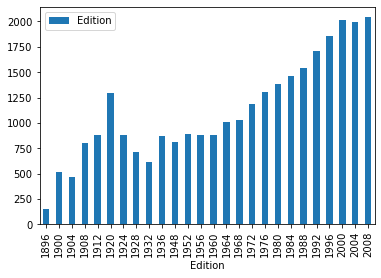

In [86]:
df1.groupby('Edition').agg({'Edition' : 'count'}).plot(kind = 'bar')

2. Create a list showing the number of medals won by each country throughout the history of olympics. Also, for each country include the year of first and most recent wins

In [87]:
df1.groupby('NOC').agg({'Edition':['min','max','count']})

Edition            
        min   max count
NOC                    
AFG    2008  2008     1
AHO    1988  1988     1
ALG    1984  2008    14
ANZ    1908  1912    29
ARG    1924  2008   239
..      ...   ...   ...
VIE    2000  2008     2
YUG    1924  2000   435
ZAM    1984  1996     2
ZIM    1980  2008    23
ZZX    1896  1904    48

[138 rows x 3 columns]

# Reshaping


very useful when used in conjunction with group by

unstack() - used to convert inner columns to rows

stack() - does it opposite

note:level is automatically sorted in both


In [95]:
mw_df = df1[(df1['Edition'] == 2008) & ((df1['Event'] == '100m') | (df1['Event'] == '200m'))].groupby(['NOC','Gender','Event','Discipline']).size()
mw_df


NOC  Gender  Event  Discipline
JAM  Men     100m   Athletics     1
             200m   Athletics     1
     Women   100m   Athletics     3
             200m   Athletics     2
TRI  Men     100m   Athletics     1
USA  Men     100m   Athletics     1
             200m   Athletics     2
     Women   200m   Athletics     1
dtype: int64

In [97]:
mw_df1 = mw_df.unstack(['Discipline', 'Event']) # if you write this list in reverse order it gives a bit different results
mw_df1


Discipline Athletics     
Event           100m 200m
NOC Gender               
JAM Men          1.0  1.0
    Women        3.0  2.0
TRI Men          1.0  NaN
USA Men          1.0  2.0
    Women        NaN  1.0

stack()

pivot the level of column labels returns dataframe or series, with new innermost level of row labels

To remember it, stack makes the table taller

stack(level = -1 , dropna = True)

In [98]:
mw_df1.stack('Event')

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

unstack()

pivot the level of index labels returns dataframe or series, with new innermost level of row labels

If it is multiindex then it returns a DataFrame else series

To remember it, stack makes the table wider

stack(level = -1 , full_value = None)

In [101]:
mw_df1.unstack('Gender')

Discipline Athletics                 
Event           100m       200m      
Gender           Men Women  Men Women
NOC                                  
JAM              1.0   3.0  1.0   2.0
TRI              1.0   NaN  NaN   NaN
USA              1.0   NaN  2.0   1.0

CHALLENGE

1. Plot the number of gold medal won by USA male and female Athlete throughout the history of olympics